# `poutil` Instance

## construct model

In [1]:
from NSPLIB.src.instances.poutil.poutil_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
# alg = CaoZavalaAlgo(m, solver='gurobi')
# alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-3,ubd_midpt_fix=1)
from pyomo.opt import SolverFactory
solver=SolverFactory('gurobi')
solver.solve(m.origin_model,tee=True)


Building models...
Done.


Read LP format model from file /var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/tmpsybeckwy.pyomo.lp
Reading time = 0.01 seconds
x1: 6534 rows, 3776 columns, 27849 nonzeros
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6534 rows, 3776 columns and 27849 nonzeros
Model fingerprint: 0x82b56563
Variable types: 1463 continuous, 2313 integer (2313 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 546 rows and 433 columns
Presolve time: 0.04s
Presolved: 5988 rows, 3343 columns, 25688 nonzeros
Variable types: 378 continuous, 2965 integer (2689 binary)
Found heuristic solution: objective 307252.61447

Root relaxation: objective 2.452521e+05, 3393 iterations, 0.05 seconds (0.06 work units)

    Nodes    |   

{'Problem': [{'Name': 'x1', 'Lower bound': 266187.5332404778, 'Upper bound': 266187.5332404778, 'Number of objectives': 1, 'Number of constraints': 6534, 'Number of variables': 3776, 'Number of binary variables': 2313, 'Number of integer variables': 2313, 'Number of continuous variables': 1463, 'Number of nonzeros': 27849, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': 0, 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': 69818.31909608841, 'Error rc': 0}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [2]:
m.origin_model.y.pprint()

y : Size=2, Index={alpha, beta}
    Key   : Lower : Value             : Upper : Fixed : Stale : Domain
    alpha :     0 : 74.94473247856709 :   470 : False : False : NonNegativeReals
     beta :     0 : 9.000000000000028 :   470 : False : False : NonNegativeReals


In [1]:
from NSPLIB.src.instances.poutil.poutil_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
from pyomo.opt import SolverFactory
solver = SolverFactory('gurobi')
solver.solve(m.origin_model, tee=True)

Building models...
Done.


Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-16
Read LP format model from file /var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/tmp3fgjp36m.pyomo.lp
Reading time = 0.01 seconds
x1: 6534 rows, 3776 columns, 27849 nonzeros
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D60)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6534 rows, 3776 columns and 27849 nonzeros
Model fingerprint: 0x82b56563
Variable types: 1463 continuous, 2313 integer (2313 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 546 rows and 433 columns
Presolve time: 0.04s
Presolved: 5988 rows, 3343 columns, 25688 nonzeros
Variable types: 378 continuous, 2965 integer (2689 binary)
Found heuristic solution: objective 307252.61447

Root relaxation:

KeyboardInterrupt: 

In [ ]:
{i:m.origin_model.y[i].value for i in m.origin_model.y}

In [ ]:
lbd=alg.res.sol["final_lbd"]
ubd=alg.res.sol["final_ubd"]
global_sol=267635.3986252598
counter=0
for i in alg.res.lbds:
    if abs((i-global_sol)/global_sol)<0.003:
        counter+=1
counter/len(alg.res.lbds)

0.8290598290598291

In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
orig_m=m.origin_model
SolverFactory('gurobi').solve(orig_m)

Exception in thread Thread-5 (_mergedReader):
Traceback (most recent call last):
  File "/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/pyomo/common/tee.py", line 517, in _mergedReader
    ready_handles = select(list(handles), noop, noop, _poll)[0]
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 9] Bad file descriptor


KeyboardInterrupt: 

## SBB run

In [ ]:
alg = CaoZavalaAlgo(m, solver='gurobi')

# # SBB solve
alg.solve(max_iter=1e2, max_time=3600*8, tol=1e-4)


Solving the problem via SBB...
	Maximum iteration: 100.0
	Maximum time: 28800
	Tolerance: 1E-04
Initialize the model...


In [ ]:
# final results
alg.res.sol

{'y': {'alpha': 74.97222900390625, 'beta': 8.9788818359375},
 'final_lbd': 266177.34431857837,
 'final_ubd': 266190.8920372216,
 'sbb_node_n': 73,
 'time': {'lbd': 437.3955292701721,
  'ubd': 57.33837914466858,
  'bt': 0.0,
  'total': 494.7339084148407}}

In [ ]:
x = alg.res.sol
gap = abs(x['final_lbd'] - x['final_ubd']) / abs(max(x['final_lbd'], x['final_ubd']))
gap * 100

0.0050894749025884945

## bb node vs. gap plot

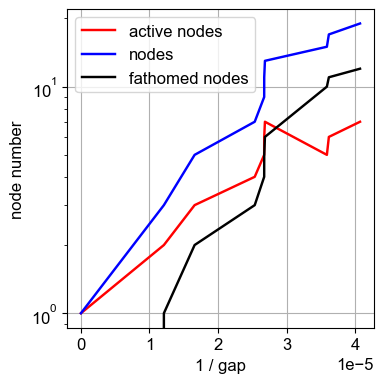

In [ ]:
alg.res.plot_bb_n_gap('semilogy')

## convergence order

### solve full model to obtain optimal y value

In [ ]:
from pyomo.environ import SolverFactory

ori_m = m.origin_model
opt = SolverFactory('gurobi')
res_ori = opt.solve(ori_m, tee=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-11
Read LP format model from file /var/folders/02/59xf2rz134l9w97kw2rhkmch0000gn/T/tmpuha3lfvj.pyomo.lp
Reading time = 0.03 seconds
x3780: 6535 rows, 3777 columns, 27850 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6535 rows, 3777 columns and 27850 nonzeros
Model fingerprint: 0x8ac8745e
Variable types: 1464 continuous, 2313 integer (2313 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 547 rows and 434 columns
Presolve time: 0.05s
Presolved: 5988 rows, 3343 columns, 25690 nonzeros
Variable types: 378 continuous, 2965 integer (2689 binary)
Found heuristic solution: objective 307252.61447

Root relaxation: objective 2.4

KeyboardInterrupt: 

In [ ]:
from pyomo.environ import value

y_set = m.y_set.copy()
y_val = {i: value(ori_m.y[i]) for i in y_set}
v_val = value(ori_m.obj)

In [ ]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order

ca = HausdorffAnalyzer(alg)

eps_min = -7
eps_max = 0
steps = 8

tol = 1e-9

eps_list, distances = ca.analyze(y=y_val, y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 5.98E+07
	diameter = 1.0E-01, distance = 5.98E+06
	diameter = 1.0E-02, distance = 5.98E+05
	diameter = 1.0E-03, distance = 5.98E+04
	diameter = 1.0E-04, distance = 5.98E+03
	diameter = 1.0E-05, distance = 5.98E+02
	diameter = 1.0E-06, distance = 5.98E+01
	diameter = 1.0E-07, distance = 5.98E+00
Done!


(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='$\\mathrm{diam}(Y)$', ylabel='Hausdorff metric'>)

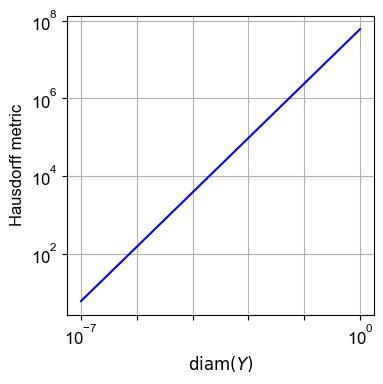

In [ ]:
plot_converge_order(eps_list, distances)

## value function visualization

/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)


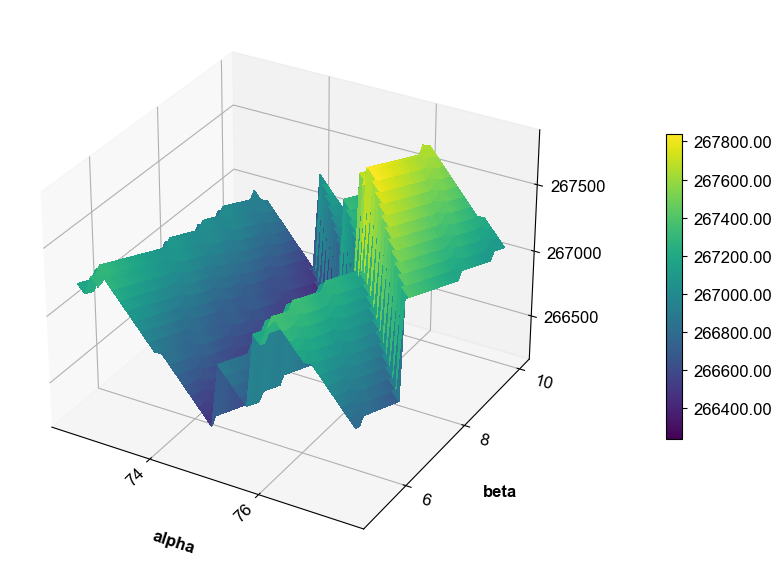

In [ ]:
from src.analyses.value_function import ValueFunction

v_f = ValueFunction(m, solver='gurobi')

y_set = m.y_set.copy()
y_val = {
    'alpha': 74.97222900390625,
    'beta': 8.9788818359375
}

idx_1 = 'alpha'
idx_2 = 'beta'

interval_1 = (72.5, 77.5)
interval_2 = (5, 10)

v_f.calc_2D(idx_1, idx_2, y_val, interval_1=interval_1, interval_2=interval_2, step=40)
v_f.plot_2D()

In [ ]:
v_f.save()

## direct solve

In [ ]:
from pyomo.environ import SolverFactory
ori_m = m.origin_model

opt = SolverFactory('gurobi')
opt.options['MIPGAP'] = 1e-4
opt.options['TimeLimit'] = 3600 * 8
res = opt.solve(ori_m, tee=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-11
Read LP format model from file /var/folders/02/59xf2rz134l9w97kw2rhkmch0000gn/T/tmp_g2ydu8d.pyomo.lp
Reading time = 0.04 seconds
x3780: 6535 rows, 3777 columns, 27850 nonzeros
Set parameter TimeLimit to value 28800
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6535 rows, 3777 columns and 27850 nonzeros
Model fingerprint: 0x8ac8745e
Variable types: 1464 continuous, 2313 integer (2313 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+04]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 547 rows and 434 columns
Presolve time: 0.08s
Presolved: 5988 rows, 3343 columns, 25690 nonzeros
Variable types: 378 continuous, 2965 integer (2689 binary)
Found heuristic solution: objective 30725